In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')


from scipy import stats
from sklearn import linear_model
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from math import log

In [2]:
data=pd.read_csv('kc_house_data.csv',parse_dates=['date'])

In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


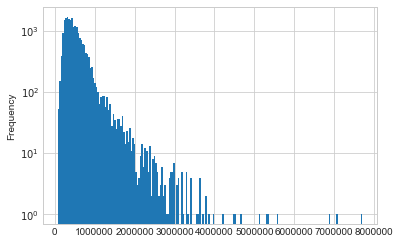

In [4]:
data.price.plot(kind='hist',bins=200,log=True)

In [5]:
data[data['price']>4e6] # 11 houses greated than 4M

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2626,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8638,3835500195,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


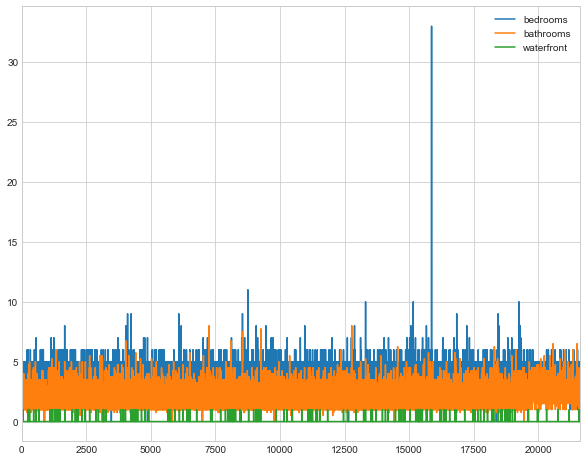

In [6]:
plt.figure(figsize=(10,8))
data.bedrooms.plot(),data.bathrooms.plot(),data.waterfront.plot()
plt.legend()

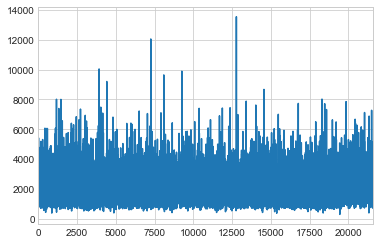

In [7]:
data.sqft_living.plot()

# BOX PLOT

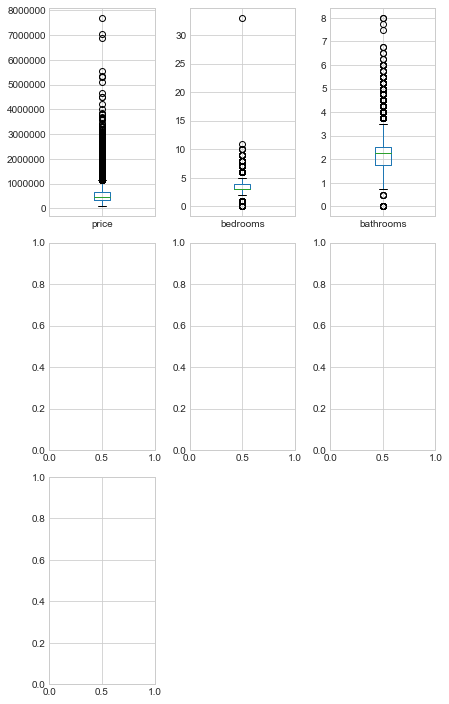

In [8]:
fig=plt.figure(figsize=(6,10))

ax1=plt.subplot(331)
ax2=plt.subplot(332)
ax3=plt.subplot(333)
ax4=plt.subplot(334)
ax5=plt.subplot(335)
ax6=plt.subplot(336)
ax7=plt.subplot(337)


data.boxplot(column='price',ax=ax1)
data.boxplot(column='bedrooms',ax=ax2)
data.boxplot(column='bathrooms',ax=ax3)


plt.suptitle('')
plt.tight_layout()

In [9]:
data[data['bedrooms']>10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [10]:
data.quantile(0.90).astype('int') # quantile(0.99)

id               8732028218
price                887000
bedrooms                  4
bathrooms                 3
sqft_living            3250
sqft_lot              21397
floors                    2
waterfront                0
view                      0
condition                 4
grade                     9
sqft_above             2950
sqft_basement           970
yr_built               2007
yr_renovated              0
zipcode               98155
lat                      47
long                   -122
sqft_living15          2930
sqft_lot15            17852
Name: 0.9, dtype: int64

# Removing Outliers

In [11]:
outliers=data.quantile(0.90)
x=data[(data['price']<outliers['price'])]
x=x[(x['bedrooms']< outliers['bedrooms'])]
x=x[(x['bathrooms']< outliers['bathrooms'])]
x=x[(x['sqft_living']< outliers['sqft_living'])]
x.shape

(11712, 21)

In [12]:
data.shape

(21613, 21)

# Creating Dummies

In [13]:
x_zipcode=pd.get_dummies(x['zipcode'],drop_first=True)

In [14]:
x=pd.concat([x,x_zipcode],axis=1)

In [15]:
x['built_ago']=2017-x['yr_built']
x['have_basement']=np.where(x['sqft_living']>0,1,0)
x['renovated']=np.where(x['yr_renovated']>0,1,0)
x['weighted_bath']=x['bathrooms'] **2
x['weighted_livingspace']=x['sqft_living']**2
x['diff_living']=x['sqft_living']-x['sqft_living15']
x['bed_bath_ratio']=(x['bedrooms']+1)/(x['bathrooms']+1)

In [16]:
y=x.price
x=x.drop(['id','date','zipcode','lat','long','price','yr_built','sqft_basement','bathrooms'],axis=1) # all of them id date zipcode lat long price yr_renovated yr_built sqft_basement bathrooms grade

# Test Split

In [17]:
# Linear Regression
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((9369, 88), (9369,), (2343, 88), (2343,))

In [18]:
reg=linear_model.LinearRegression()
regmodel=reg.fit(x_train,y_train)
y_predtest=reg.predict(x_test)

In [19]:
RMS=mean_squared_error(y_test,y_predtest) ** 0.5
RMS

71972.313409169568

In [20]:
# Lasso

In [21]:
from sklearn.linear_model import Lasso
ls=Lasso()
l=ls.fit(x_train,y_train)
y_ls_predtest=ls.predict(x_test)
ls_rmse=mean_squared_error(y_test,y_ls_predtest) ** 0.5
ls_rmse

71872.274572752882